<a href="https://colab.research.google.com/github/raissulaiman/Data-Analyst-Project-Business-Decision-Research/blob/main/Data_Analyst_Project_Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STUDI KASUS**
DQLab sport center adalah toko yang menjual berbagai kebutuhan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini mulai berjualan sejak tahun 2013, sehingga sudah memiliki pelanggan tetap sejak lama, dan tetap berusaha untuk mendapatkan pelanggan baru sampai saat ini.

Di awal tahun 2019,   manajer toko tersebut merekrut junior DA untuk membantu  memecahkan masalah yang ada di tokonya, yaitu menurunnya pelanggan yang membeli kembali ke tokonya.  Junior DA tersebut pun diberi kepercayaan mengolah data transaksi toko tersebut. Manajer toko mendefinisikan bahwa customer termasuk sudah bukan disebut pelanggan lagi (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.  

Manajer toko pun memberikan data transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

Berikut tampilan datanya:

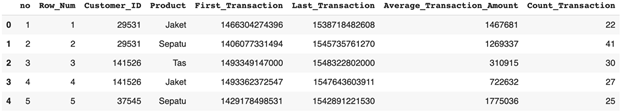


Field yang ada pada data tersebut antara lain:

1. No
2. Row_Num
3. Customer_ID
4. Product
5. irst_Transaction
6. Last_Transaction
7. Average_Transaction_Amount
8. Count_Transaction
 

## **PERSIAPAN**
Untuk mempersiapkan analisis studi kasus tersebut, ada beberapa langkah yang perlu dilakukan, yaitu:
1. **Data preparation test**
*   Importing data: Melakukan import data_retail.csv ke python environment.
*   Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.
2. **Data Visualization test** 
*   Mendapatkan insight dari hasil visualisasi yang telah dibuat.
3. **Basic stats method test**
*   Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.

Sedangkan untuk data yang digunakan adalah data dari  https://storage.googleapis.com/dqlab-dataset/data_retail.csv 

# **DATA PREPARATION** 

## **1. Import Data and Inspection**
Tahap ini adalah tahap mengimport dataset yang akan digunakan, dengan menggunakan library pandas.

Pandas adalah library python open source yang biasanya digunakan untuk kebutuhan data analisis. Pandas membuat Python supaya dapat bekerja dengan data yang berbentuk tabular seperti spreadsheet dengan cara pemuatan data yang cepat, manipulasi data, menggabungkan data, serta ada berbagai fungsi yang lain. 


In [ ]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep = ';')

Setelah mengimport dataset yang digunakan, kemudian menginspeksi data tersebut dengan:

*   mencetak lima data teratas saja
*   mencetak info dataset


In [ ]:
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 

Berdasarkan hasil output diatas, dapat disimpulkan bahwa dataset memiliki 8 kolom dan 100.000 baris dengan semua baris terisi, tidak ada yang NULL. 

Dari data type diatas, dapat dilihat bahwa ada yang kurang tepat, yaitu pada kolom 'First_Transaction' dan 'Last_Transaction' dimana kolom tersebut memiliki tipe data int64, sedangkan kedua kolom merupakan tanggal, sehingga perlu dilakukan perbaikan. 

## **2. Data Cleansing**
Pada data cleansing, akan dilakukan perubahan tipe data untuk kolom 'First_Transaction' dan 'Last_Transaction' yang semula int64, menjadi datetime.

In [ ]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

Kemudian mencetak 5 data teratas dan info dari dataset apakah sudah berubah tipe data bagi kedua kolom tersebut.

In [ ]:
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null 

dari output diatas, sudah dipastikan bahwa tipe data untuk kedua kolom sudah berubah. Maka, langkah selanjutnya adalah membuat kolom untuk churn customer, apakah customer termasuk churn atau tidak, dimana sebelumnya belum ada kolom tersebut.

## **3. Churn Customer**
Customer dapat dikatakan bukan pelanggan lagi jika customer tidak lagi berbelanja sampai 6 bulan terakhir dari update data terakhir yang tersedia. 

In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000013


Pada dataset, diketahui bahwa transaksi terakhir dari website adalah 2019-02-01, sehingga customer sudah bukan disebut pelanggan lagi (churn) jika sudah tidak bertransaksi lagi setelah 2018-08-01. Transaksi akan digolongkan menjadi dua tipe:


*   customer is churn: jika Last_Transaction <= 2018-08-01
*   customer is not churn: jika Last_Transaction >= 2018-08-01

Kemudian membuat kolom apakah customer churn atau tidak dengan menggunakan boolean.



In [ ]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01','is_churn'] = False 

Kemudian mencetak 5 data teratas dan info dari dataset tersebut.

In [ ]:
print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Count_Transaction is_churn
0   1        1  ...                 22    False
1   2        2  ...                 41    False
2   3        3  ...                 30    False
3   4        4  ...                 27    False
4   5        5  ...                 25    False

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Am

Dari output diatas, diketahui bahwa sudah ada kolom 'is_churn' untuk mengetahui apakah customer churn atau tidak. Kemudian, setelah sudah ada kolom churn, diperlukan langkah untuk mempermudah dalam analisis dengan menghapus kolom yang tidak diperlukan lagi. 

## **4. Menghapus Kolom yang Tidak Diperlukan**
dari info dataset, kita dapat mengetahui ada 8 kolom yang tersedia, dan untuk melakukan analisis, tidak semua data dari kolom tersebut diperlukan. Oleh karena itu, akan dihapus 2 kolom yang tidak diperlukan dalam analisis ini, yaitu kolom 'no' dan 'Row_Num'. 

In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

Kemudian mencetak 5 data teratas

In [ ]:
# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Count_Transaction is_churn
0        29531   Jaket  ...                22    False
1        29531  Sepatu  ...                41    False
2       141526     Tas  ...                30    False
3       141526   Jaket  ...                27    False
4        37545  Sepatu  ...                25    False

[5 rows x 7 columns]


# **DATA VISUALIZATION**

## **1. Customer Acquisition Per Year**
Pada bagian ini akan dicari jumlah kustomer baru yang datang di website ini. Dengan menggunakan visualisasi untuk memudahkan dalam proses menyimpulkan.

Pada studi kasus kali ini, untuk membuat visualisasi pada python, dapat menggunakan library pandas berupa `matplotlib.pyplot`.

Langkah pertama adalag mengimport library `matplotlib.pyplot` kedalam python.




In [ ]:
import matplotlib.pyplot as plt


Untuk kasus ini, visualisasi menggunakan bar chart. Sebelum membuat bar chart, langkah sebelumnya menambahkan feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction.

In [ ]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

Setelah itu, membuat bar chart dengan library `plt` untuk Customer Acquisition Per Year dengan `groupby()` tabel 'First_Transaction' dan 'CustomerID'.

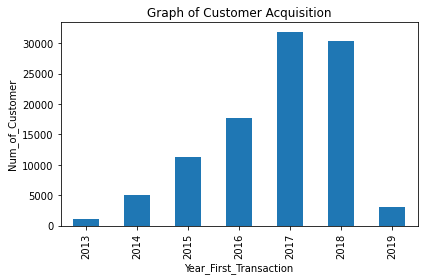

In [ ]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()

Dari grafik diatas, dapat disimpulkan bahwa ada penurunan customer baru dari tahun 2017 ke tahun 2018, sehingga perlu diselidiki mengapa hal itu bisa terjadi. 

## **2. Transaction Per Year**
Setelah mengetahui berapa banyak kustomer yang datang setiap tahun, kemudian melihat jumlah transaksi per tahunnya dari studi kasus dengan menggunakan bar chart. 

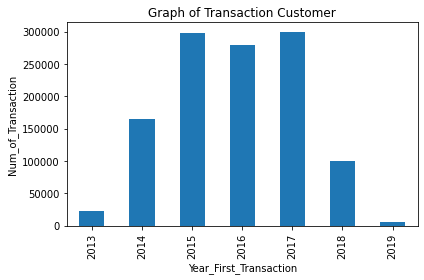

In [ ]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Diketahui bahwa selain jumlah kustomer yang menurun, jumlah transaksi kustomer setiap tahun menurun dari tahun 2017 ke tahun 2018.

## **3. Average Transaction Amount Per Year**
Kemudian langkah selanjutnya mencari tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya. Selain menggunakan `matplotlib.pyplot()`, pada kasus ini juga menggunakan library python `seaborn`. 

Langkah pertama seperti library python yang lain yaitu mengimport library `seaborn` 

In [ ]:
import seaborn as sns

Kemudian membuat line graphic untuk kasus ini dengan menggunakan library `matplotlib` dan `seaborn`.

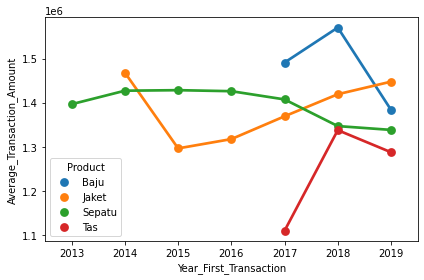

In [ ]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

Pada grafik diatas, dapat diketahui bahwa baju, jaket, dan tas mengalami peningkatan dalam penjualan, sedangkan sepatu mengalami penurunan pembelian. 

## **4. Proporsi churned customer untuk setiap produk**
Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. 

Sebelum membuat pie chart, langkah pertama membuat pivot table untuk churn customer.


<Figure size 432x288 with 0 Axes>

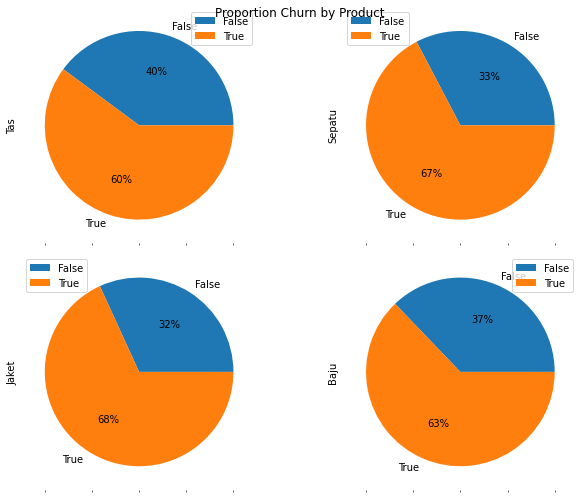

In [ ]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Dapat diketahui bahwa proporsi terbesar untuk churned customer ada pada produk jaket, disusul sepatu, baju, dan tas. 

## **5. Distribusi kategorisasi count transaction**
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

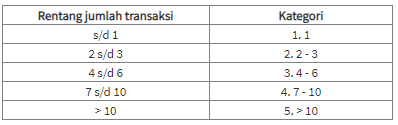

Sehingga, sebelum membuat visualisasi, maka perlu menambahkan kolom baru untuk kategori ini dengan nama Count_Transaction_Group. 

In [ ]:

# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)


Kemudian membuat visualisasi dengan bar chart


Text(0, 0.5, 'Num_of_Customer')

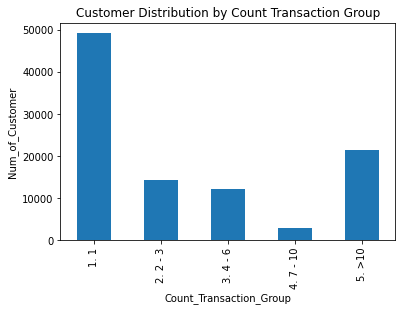

In [ ]:
plt.clf()
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')

Dari output diatas, dapat diketahui bahwa jumlah transaksi kustomer lebih banyak pada transaksi sekali. 

## **6. Distribusi kategorisasi average transaction amount**
Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:

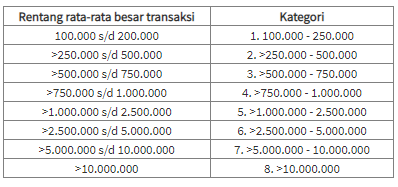

Sebelum melakukan visualisasi, maka perlu membuat kolom untuk distribusi.

In [ ]:
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. >500.000 - 750.000' 
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
    
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

Kemudian membuat visualisasi dengan bar chart

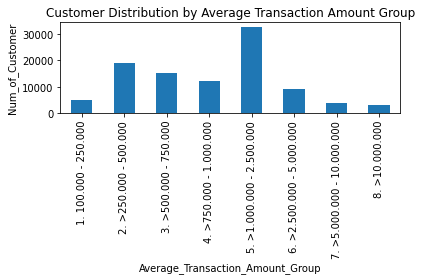

In [ ]:
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Sehingga dapat disimpulkan, bahwa jumlah rata-rata transaksi terbesar yaitu >1.000.000 - 2.500.000

# **BASIC STAT METHOD (MODELLING)**

## **1. Pemodelan Dengan Scikit-Learn**
Di bagian ini akan dilakukan pemodelan machine learning untuk menentukan keputusan yang tepat.

Langkah pertama yaitu menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Oleh karena itu, dibuat terlebih dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini bersama Average_Transaction_Amount dan Count_Transaction sebagai variabel independent X. 

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.
Jangan lupa untuk merubah tipe data y dari `object` menjadi `int`

 

In [ ]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn']
y=y.astype('int64') 

Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data. 

Dengan menggunakan library Scikit-Learn untuk memodelkan kasus ini.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## **2. Logistic Regression**
Langkah selanjutnya akan membuat model menggunakan Logistic Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data

logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


## **3. Visualisasi Confusion Matrix**
Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. 
Sebelumnya import pandas library yang diperlukan, yaitu `numpy`, `matplotlib.pyplot`, dan `seaborn`.

<Figure size 432x288 with 0 Axes>

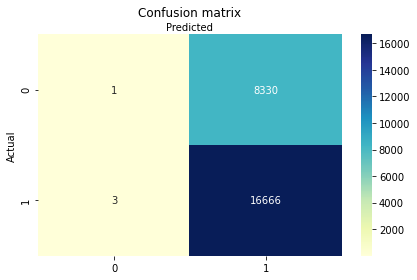

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Berdasarkan matriks diatas diketahui:

*   True Negative (TN) = 1
*   True Positive (TP) = 16666
*   False Positive (FP) = 8330
*   False Negative (FN) = 3

Untuk penjelasannya:

*   True Negative (TN): Jumlah customer yang diprediksi tidak churn (0) dan kenyataannya tidak churn (0)
*   True Positive (TP): Jumlah customer yang diprediksi churn (1) dan kenyataannya churn (1)
*   False Positive: Jumlah customer yang diprediksi churn (1) dan kenyataannya adalah tidak churn (0)
*   False Negative: Jumlah customer yang diprediksi tidak churn (0) dan kenyataannya churn (1)

Dapat dilihat bahwa kesalahan menyimpulkan disini cukup besar pada kasus ini, dan sebaiknya kita mengganti model yang lain yang akurasinya lebih tinggi, perhitungan akurasi akan dikerjakan setelah ini, namun untuk studi kasus ini kita boleh menerima model ini yang berarti kita menerima Tipe I Error, karena lebih baik memprediksi customer adalah churn atau yang tidak berbelanja lagi pada toko ini, namun kenyataannya mereka ada customer tidak churn, ini dikarenenakan agar toko dapat memperbaiki kualitasnya dengan maksimal jika terdapat banyak customer yang churn.  














## **4. Accuracy, Precision, Recall**
Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.


*   Accuracy: Merupakan rasio prediksi dan aktual Benar (True Positive dan True Negative) dengan keseluruhan data.
*   Precission: Merupakan rasio prediksi True Positive dibandingkan dengan keseluruhan hasil yang diprediksi positf (True Positive dan False Positive).
*   Recall: Merupakan rasio prediksi True Positive dibandingkan dengan keseluruhan data yang aktual benar (True Positive dan False Negative)





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
